## Importing libraries

In [30]:
#importing libraries
import pandas as pd
import numpy as np
import dask.array as da

import os
import glob
import keras

from tensorflow.keras.utils import Sequence
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

#import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
import os
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns

## Reading in data

In [2]:
x_ground = np.load('data/x_ground.npy')
y_ground = np.load('data/y_ground.npy')

x_service = np.load('data/x_service.npy')
y_service = np.load('data/y_service.npy')


In [3]:
print(x_ground.shape)
print(x_service.shape)


(1776, 480, 640, 3)
(2553, 480, 640, 3)


In [4]:
y_ground

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [5]:
y_service


array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

## Combine groundstrokes and serve data

In [6]:
x = np.append(x_ground,x_service,axis=0)
y = np.append(y_ground,y_service,axis=0)


In [7]:
# resizing frames

x_resized = []

for i in x:
    x_resized.append(resize(i,(120,160)))

x_resized = np.array(x_resized)


In [8]:
x_resized.shape


(4329, 120, 160, 3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_resized, y, train_size = 0.8, test_size = 0.2, random_state = 42, stratify = y)

## Model building and training

In [10]:
#Using Keras Sequential API

batch_size = 128
num_classes = 2
epochs = 100

# input image dimensions
img_rows, img_cols = 120, 160


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 3)))

# model.add(MaxPooling2D(pool_size=(2, 2),padding='SAME'))
# model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='SAME'))
model.add(BatchNormalization())


model.add(Conv2D(64, (4, 4), activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='SAME'))
model.add(BatchNormalization())


# model.add(Conv2D(256, (5, 5), activation='relu',padding='SAME'))
# model.add(MaxPooling2D(pool_size=(2, 2),padding='SAME'))
# model.add(BatchNormalization())


# model.add(Conv2D(512, (5, 5), activation='relu',padding='SAME'))
# model.add(MaxPooling2D(pool_size=(2, 2),padding='SAME'))
# model.add(BatchNormalization())


# model.add(Conv2D(1024, (5, 5), activation='relu',padding='SAME'))
# model.add(MaxPooling2D(pool_size=(2, 2),padding='SAME'))
# model.add(BatchNormalization())


# model.add(Conv2D(128, (7, 7), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dense(16384, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


Metal device set to: Apple M1 Pro


2022-05-31 02:17:34.992946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-31 02:17:34.993203: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 158, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 156, 64)      18496     
                                                                 
 batch_normalization (BatchN  (None, 116, 156, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 156, 64)      65600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 78, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 58, 78, 64)       2

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])


In [13]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
                   )


Epoch 1/100


2022-05-31 02:17:51.271785: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-31 02:17:51.625398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - ETA: 0s - loss: 196.8538 - accuracy: 0.6050

2022-05-31 02:18:08.497860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 18s 592ms/step - loss: 196.8538 - accuracy: 0.6050 - val_loss: 1384.1172 - val_accuracy: 0.6005
Epoch 2/100
28/28 [==============================] - 16s 582ms/step - loss: 40.1515 - accuracy: 0.7586 - val_loss: 913.5950 - val_accuracy: 0.5993
Epoch 3/100
28/28 [==============================] - 16s 576ms/step - loss: 34.9390 - accuracy: 0.7802 - val_loss: 266.6032 - val_accuracy: 0.5843
Epoch 4/100
28/28 [==============================] - 16s 583ms/step - loss: 62.4918 - accuracy: 0.7401 - val_loss: 179.2664 - val_accuracy: 0.6697
Epoch 5/100
28/28 [==============================] - 16s 582ms/step - loss: 25.2165 - accuracy: 0.8276 - val_loss: 90.2763 - val_accuracy: 0.6697
Epoch 6/100
28/28 [==============================] - 16s 575ms/step - loss: 17.0927 - accuracy: 0.8464 - val_loss: 75.6136 - val_accuracy: 0.6674
Epoch 7/100
28/28 [==============================] - 16s 576ms/step - loss: 24.1417 - accuracy: 0.8181 - val_loss: 34.7350 - val_a

In [14]:
score1 = model.evaluate(X_test, y_test, verbose=0)
score2 = model.evaluate(X_train, y_train, verbose=0)


In [15]:
print('Test loss:', score1)
print('Train loss:', score2)

Test loss: [6.450009822845459, 0.8764433860778809]
Train loss: [3.3866405487060547, 0.9347386956214905]


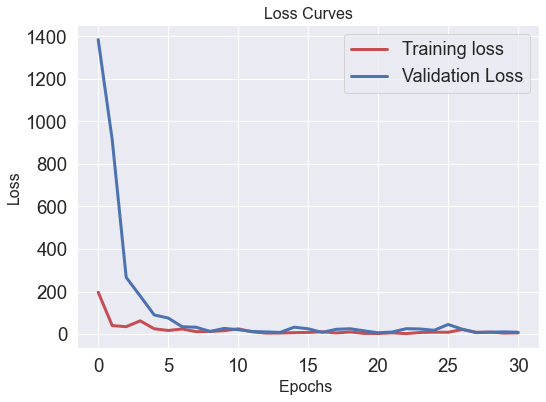

In [28]:
sns.set(font_scale=1.7)
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.tight_layout()
plt.savefig('binary_loss_curve.jpg')

In [32]:
shots = ['groundstroke','serve']

y_pred = model.predict(X_test)
pred_labels = np.argmax(y_pred,axis=1)
true_labels = np.argmax(y_test,axis=1)


In [34]:
print(metrics.classification_report(true_labels,pred_labels,target_names=shots))

              precision    recall  f1-score   support

groundstroke       0.84      0.86      0.85       355
       serve       0.90      0.88      0.89       511

    accuracy                           0.88       866
   macro avg       0.87      0.87      0.87       866
weighted avg       0.88      0.88      0.88       866



In [40]:
conf_matrix = metrics.confusion_matrix(true_labels,pred_labels)
df_cm = pd.DataFrame(conf_matrix, index = [i for i in shots],columns = [i for i in shots])

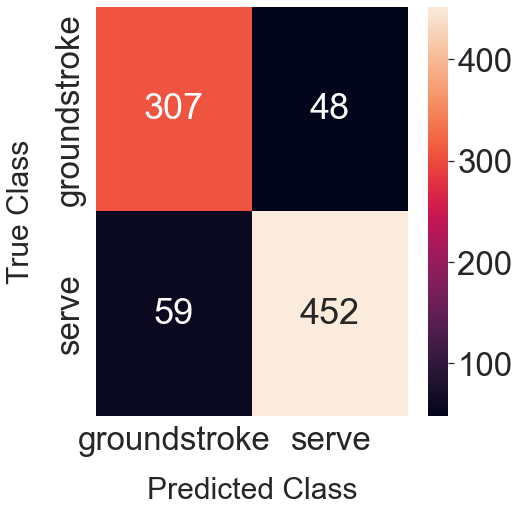

In [46]:
plt.figure(figsize=(8,8))
sns.set(font_scale=3)
ax = sns.heatmap(df_cm,annot=True,fmt='')
ax.set_xlabel('Predicted Class',fontsize=30,labelpad=20)
ax.set_ylabel('True Class',fontsize=30,labelpad=20)
plt.tight_layout()
plt.savefig('binary_confusion_matrix.jpg')

In [47]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}